<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обработка-данных-прогноза-погоды." data-toc-modified-id="Обработка-данных-прогноза-погоды.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обработка данных прогноза погоды.</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных." data-toc-modified-id="Изучение-данных.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных.</a></span></li><li><span><a href="#Заполнение-пропусков." data-toc-modified-id="Заполнение-пропусков.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Заполнение пропусков.</a></span></li><li><span><a href="#Поиск-выбросов." data-toc-modified-id="Поиск-выбросов.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Поиск выбросов.</a></span></li></ul></li><li><span><a href="#Обработка-данных-потребления-электроэнергии." data-toc-modified-id="Обработка-данных-потребления-электроэнергии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обработка данных потребления электроэнергии.</a></span><ul class="toc-item"><li><span><a href="#Парсинг-данных." data-toc-modified-id="Парсинг-данных.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Парсинг данных.</a></span></li><li><span><a href="#Поиск-выбросов." data-toc-modified-id="Поиск-выбросов.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск выбросов.</a></span></li></ul></li><li><span><a href="#Результирующая-таблица." data-toc-modified-id="Результирующая-таблица.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Результирующая таблица.</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков." data-toc-modified-id="Заполнение-пропусков.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Заполнение пропусков.</a></span></li><li><span><a href="#Сохранение-данных-в-файл-xlsx-и-загрузка-его-в-базу-данных." data-toc-modified-id="Сохранение-данных-в-файл-xlsx-и-загрузка-его-в-базу-данных.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сохранение данных в файл <code>xlsx</code> и загрузка его в базу данных.</a></span></li></ul></li></ul></div>

# Задача 1

Собрать и обработать данные, представляющие собой вектор признаков для построения модели прогноза потребления электроэнергии (вектор значений целевой функции):
-	 Данные прогноза погоды (температура, скорость и направление ветра, влажность, осадки)  за 2021и 2022г;
https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B5_(%D0%92%D0%94%D0%9D%D0%A5)
-	Данные потребления электроэнергии за 2021и 2022г;   
https://www.so-ups.ru/functioning/ees/oes-center/oes-center-indicators/oes-center-gen-consump-hour/

Полученные данные привести к почасовому формату (см. таблицу ниже) , обработать и записать их в файл .xlsx, создать БД (любую) и внести данные в нее.

| День-месяц-год часы:минуты | Потребление | Температура воздуха | Скорость ветра | Направление ветра | Осадки | Влажность |
|:--------------------------:|:-----------:|:-------------------:|:--------------:|:-----------------:|:------:|:---------:|


Требования к данным:   
  1) В данных не должно быть пропусков, они должны быть упорядочены по времени   
  2) Если есть выбросы, их нужно отдельно обработать   
  3) Если есть несогласованные данные (например, выходят за границы допустимого диапазона) их нужно также отдельно обработать   


# Решение

## Обработка данных прогноза погоды.
По ссылке необходимые данные за определенный период можно без проблем скачать с сайта через браузер.   
После загрузки данных в формате `xls` сохраним таблицу в рабочей папке и начнём их предобработку.  

### Изучение данных.
По ссылке необходимые данные за определенный период можно без проблем скачать с сайта через браузер.   
После загрузки данных в формате `xls` сохраним таблицу в рабочей папке и начнём их предобработку.  

In [1]:
# Импорт стандартных библиотек
import warnings
import datetime as dt

# Импорт сторонних библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import urllib3

# Настройка отображения графиков "matplotlib.pyplot"
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5

# Отключение предупреждений
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')
urllib3.disable_warnings()

In [2]:
# Считывание файла и запись в переменную
df_wether = pd.read_excel('27612.01.01.2021.31.12.2022.1.0.0.ru.utf8.00000000.xls', skiprows=6)
df_wether.head()

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.2022 21:00,1.3,748.5,762.6,-0.5,88.0,"Ветер, дующий с юга",1,NaN,NaN,...,NaN,NaN,20,-0.5,0.1,12.0,NaN,NaN,NaN,NaN
1,31.12.2022 18:00,1.0,749.0,763.1,0.2,92.0,"Штиль, безветрие",0,NaN,NaN,...,NaN,NaN,20,-0.1,0.9,12.0,NaN,NaN,NaN,NaN
2,31.12.2022 15:00,1.5,748.8,762.8,1.6,94.0,"Ветер, дующий с запада",1,NaN,NaN,...,NaN,NaN,20,0.7,NaN,NaN,NaN,NaN,NaN,NaN
3,31.12.2022 12:00,1.5,747.2,761.2,1.6,94.0,"Ветер, дующий с северо-запада",1,NaN,NaN,...,NaN,NaN,17,0.6,NaN,NaN,NaN,NaN,NaN,NaN
4,31.12.2022 09:00,0.9,745.6,759.7,1.3,98.0,"Ветер, дующий с северо-запада",1,NaN,NaN,...,NaN,NaN,12,0.6,5,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,30


**Замечание:**   По условию задачи нас интересует лишь некоторые признаки из этой таблицы, а именно:  
`Местное время в Москве (ВДНХ)` - День-месяц-год часы:минуты;  
`T` - Температура воздуха;  
`Ff` - Скорость ветра;   
`DD` - Направление ветра;   
`WW` - Осадки;  
`U` - Влажность.

In [3]:
df_wether = df_wether[['Местное время в Москве (ВДНХ)', 'T', 'Ff', 'DD', 'WW', 'U']]
df_wether.rename(columns={'Местное время в Москве (ВДНХ)': 'День-месяц-год часы:минуты',
                          'T': 'Температура воздуха',
                          'Ff': 'Скорость ветра',
                          'DD': 'Направление ветра',
                          'WW': 'Осадки',
                          'U': 'Влажность'}, inplace = True, errors='ignore')
df_wether.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   День-месяц-год часы:минуты  5834 non-null   object 
 1   Температура воздуха         5833 non-null   float64
 2   Скорость ветра              5834 non-null   int64  
 3   Направление ветра           5834 non-null   object 
 4   Осадки                      5834 non-null   object 
 5   Влажность                   5833 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 273.6+ KB


**Замечание:** Отфильтровали и переименовали необходимые колонки в таблице.

In [4]:
df_wether['День-месяц-год часы:минуты'] = pd.to_datetime(df_wether['День-месяц-год часы:минуты'], format='%d.%m.%Y %H:%M')
df_wether.sort_values(by='День-месяц-год часы:минуты', ascending=True, inplace=True)
df_wether.reset_index(drop=True, inplace=True) 
# Проверка значений индакса на монотонность (постоянное возрастание)
print(df_wether['День-месяц-год часы:минуты'].is_monotonic)

True


**Замечание:** Привели колонку со временем наблюдений в формат `datetime`, после чего отсортировали таблицуи выполнили проверку на возрастание данной колонки.

### Заполнение пропусков.

In [5]:
# Поиск пропущенных значений
print((df_wether == ' ').sum())
print(df_wether.isna().sum())

День-месяц-год часы:минуты       0
Температура воздуха              0
Скорость ветра                   0
Направление ветра                0
Осадки                        3421
Влажность                        0
dtype: int64
День-месяц-год часы:минуты    0
Температура воздуха           1
Скорость ветра                0
Направление ветра             0
Осадки                        0
Влажность                     1
dtype: int64


**Замечание:** В столбце `Осадки` есть много пропущенных значений в виде пробелов. По одному пропуску в столбцах `Температура воздуха` и `Влажность`.

In [6]:
# Замена пропусков
df_wether['Осадки'].replace(' ', 'нет информации', inplace=True)

In [7]:
# Поиск пропусков
df_wether[df_wether['Температура воздуха'].isna()]

,День-месяц-год часы:минуты,Температура воздуха,Скорость ветра,Направление ветра,Осадки,Влажность
3771,2022-04-17 12:00:00,NaN,0,"Штиль, безветрие",нет информации,NaN


In [8]:
# Поиск соседних значений
df_wether[3769:3772]

,День-месяц-год часы:минуты,Температура воздуха,Скорость ветра,Направление ветра,Осадки,Влажность
3769,2022-04-17 06:00:00,-0.1,3,"Ветер, дующий с севера",нет информации,63.0
3770,2022-04-17 09:00:00,1.4,3,"Ветер, дующий с северо-северо-востока",нет информации,58.0
3771,2022-04-17 12:00:00,NaN,0,"Штиль, безветрие",нет информации,NaN


**Замечание:** Логично предположить что погода меняется равномерно во времени, поэтому можно заполнить пропуски средним соседних значений.

In [9]:
# Индекс пропущенных значений
t_isna = df_wether[df_wether['Температура воздуха'].isna()].index
t_isna[0]

3771

In [10]:
# Замена пропусков
df_wether['Температура воздуха'].fillna(df_wether['Температура воздуха'][t_isna[0]-1: t_isna[0]+2].mean(), inplace=True)
df_wether['Влажность'].fillna(df_wether['Влажность'][t_isna[0]-1: t_isna[0]+2].mean(), inplace=True)
# Вывод соседних значений
df_wether[3769:3772]

,День-месяц-год часы:минуты,Температура воздуха,Скорость ветра,Направление ветра,Осадки,Влажность
3769,2022-04-17 06:00:00,-0.1,3,"Ветер, дующий с севера",нет информации,63.0
3770,2022-04-17 09:00:00,1.4,3,"Ветер, дующий с северо-северо-востока",нет информации,58.0
3771,2022-04-17 12:00:00,3.4,0,"Штиль, безветрие",нет информации,49.5


In [11]:
# Поиск пропущенных значений
print((df_wether == ' ').sum())
print(df_wether.isna().sum())
df_wether.info()

День-месяц-год часы:минуты    0
Температура воздуха           0
Скорость ветра                0
Направление ветра             0
Осадки                        0
Влажность                     0
dtype: int64
День-месяц-год часы:минуты    0
Температура воздуха           0
Скорость ветра                0
Направление ветра             0
Осадки                        0
Влажность                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   День-месяц-год часы:минуты  5834 non-null   datetime64[ns]
 1   Температура воздуха         5834 non-null   float64       
 2   Скорость ветра              5834 non-null   int64         
 3   Направление ветра           5834 non-null   object        
 4   Осадки                      5834 non-null   object        
 5   Влажность                   583

**Замечание:** Пропуски в данных заполненны.

### Поиск выбросов.

In [12]:
# Назначение признака времени наблюдений индексом
df_wether_new = df_wether.set_index('День-месяц-год часы:минуты')

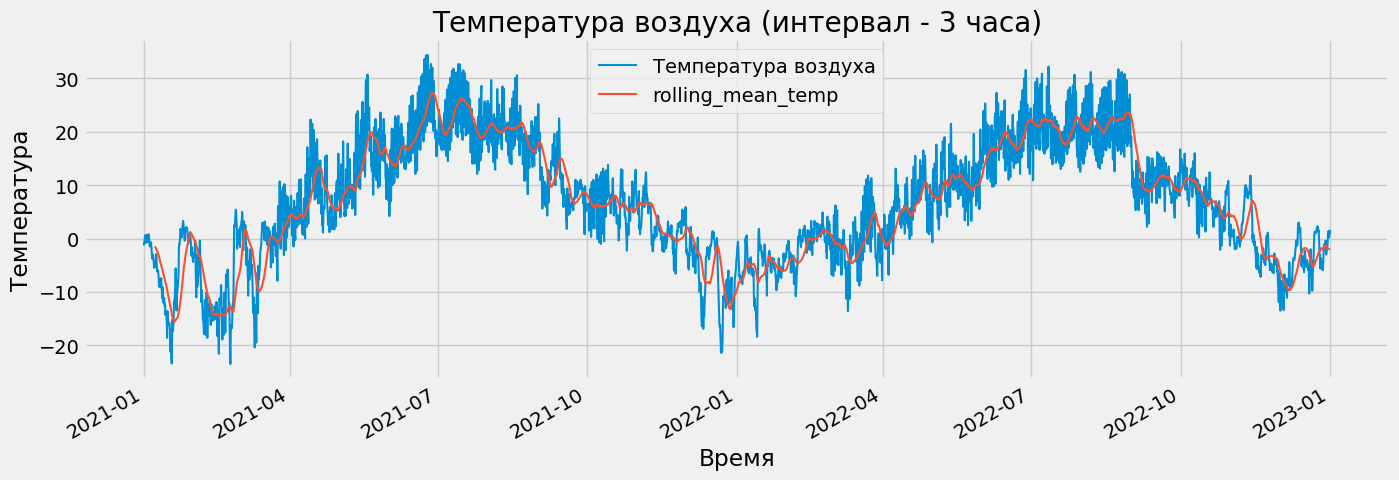

In [13]:
# Рассчёт "скользящего среднего" с окном равным 7 дней
df_wether_new['rolling_mean_temp'] = df_wether_new['Температура воздуха'].rolling(8*7).mean()
# Построение графика
df_wether_new[['Температура воздуха','rolling_mean_temp']].plot(figsize=(15,5));
plt.ylabel('Температура');
plt.xlabel('Время');
plt.title('Температура воздуха (интервал - 3 часа)');

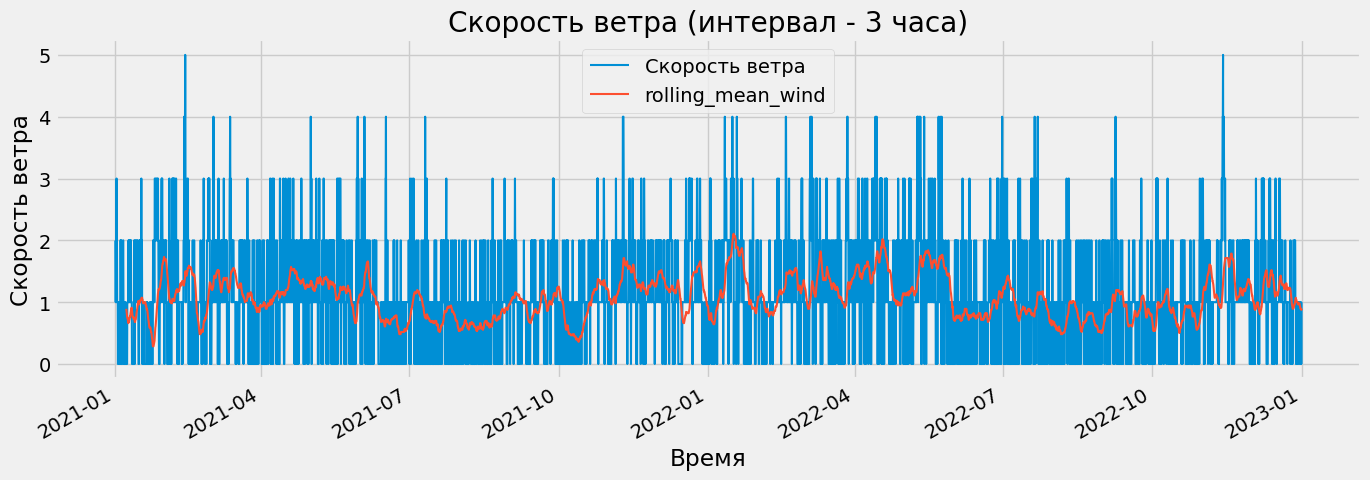

In [14]:
# Рассчёт "скользящего среднего" с окном равным 7 дней
df_wether_new['rolling_mean_wind'] = df_wether_new['Скорость ветра'].rolling(8*7).mean()
# Построение графика
df_wether_new[['Скорость ветра','rolling_mean_wind']].plot(figsize=(15,5));
plt.ylabel('Скорость ветра');
plt.xlabel('Время');
plt.title('Скорость ветра (интервал - 3 часа)');

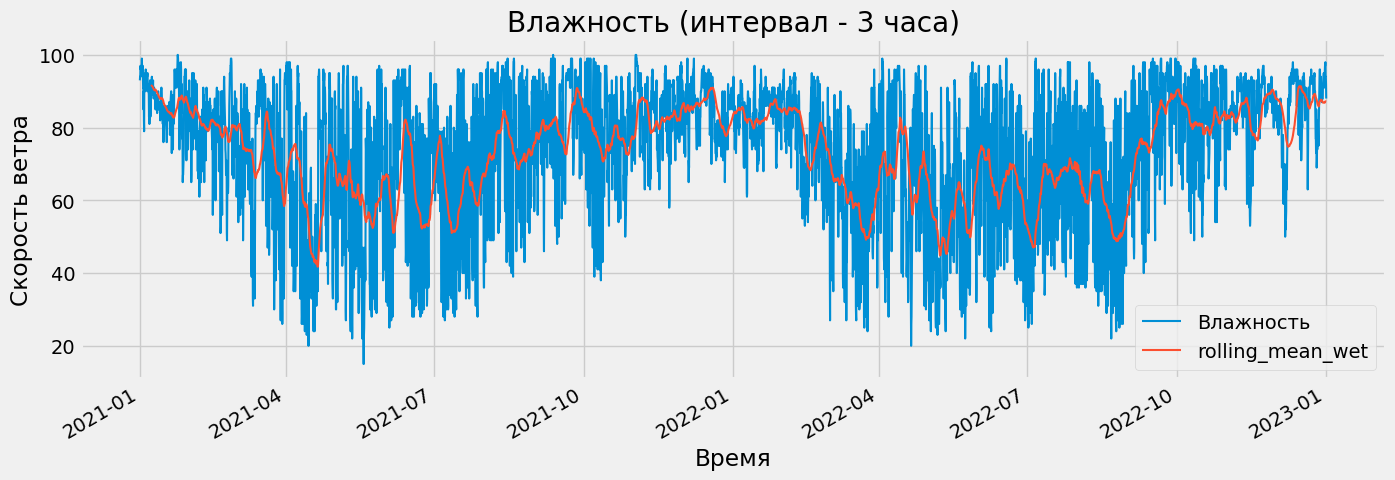

In [15]:
# Рассчёт "скользящего среднего" с окном равным 7 дней
df_wether_new['rolling_mean_wet'] = df_wether_new['Влажность'].rolling(8*7).mean()
# Построение графика
df_wether_new[['Влажность','rolling_mean_wet']].plot(figsize=(15,5));
plt.ylabel('Скорость ветра');
plt.xlabel('Время');
plt.title('Влажность (интервал - 3 часа)');

**Замечание:** На первый взгляд данные выглядят адекватно (выбросов нет).

## Обработка данных потребления электроэнергии.
По ссылке необходимые данные за необходимый нам период скачать проблемматично. Для этого нужно для каждого дня открывать новую страницу на сайте.
        Поэтому выполним парсинг данных с использованием библиотек `requests` и `BeautifulSoup`.

### Парсинг данных.
Нам нужно будет обращаться к новой странице на сайте для получения данных на определенную дату. Сначала создадим необходимфй список дат. 

In [16]:
start = dt.datetime.strptime("2021-01-01", "%Y-%m-%d")
end = dt.datetime.strptime("2023-01-01", "%Y-%m-%d")
date_generated = [start + dt.timedelta(days=x) for x in range(0, (end-start).days)]

date_str = [date.strftime("%Y-%m-%d") for date in date_generated]
date_str

['2021-01-01',
 '2021-01-02',
 '2021-01-03',
 '2021-01-04',
 '2021-01-05',
 '2021-01-06',
 '2021-01-07',
 '2021-01-08',
 '2021-01-09',
 '2021-01-10',
 '2021-01-11',
 '2021-01-12',
 '2021-01-13',
 '2021-01-14',
 '2021-01-15',
 '2021-01-16',
 '2021-01-17',
 '2021-01-18',
 '2021-01-19',
 '2021-01-20',
 '2021-01-21',
 '2021-01-22',
 '2021-01-23',
 '2021-01-24',
 '2021-01-25',
 '2021-01-26',
 '2021-01-27',
 '2021-01-28',
 '2021-01-29',
 '2021-01-30',
 '2021-01-31',
 '2021-02-01',
 '2021-02-02',
 '2021-02-03',
 '2021-02-04',
 '2021-02-05',
 '2021-02-06',
 '2021-02-07',
 '2021-02-08',
 '2021-02-09',
 '2021-02-10',
 '2021-02-11',
 '2021-02-12',
 '2021-02-13',
 '2021-02-14',
 '2021-02-15',
 '2021-02-16',
 '2021-02-17',
 '2021-02-18',
 '2021-02-19',
 '2021-02-20',
 '2021-02-21',
 '2021-02-22',
 '2021-02-23',
 '2021-02-24',
 '2021-02-25',
 '2021-02-26',
 '2021-02-27',
 '2021-02-28',
 '2021-03-01',
 '2021-03-02',
 '2021-03-03',
 '2021-03-04',
 '2021-03-05',
 '2021-03-06',
 '2021-03-07',
 '2021-03-

**Замечание:** Получился список с необходимыми датам в нужном виде для добавления его в ссылку на страницу сайта.

In [17]:
# Словарь для сбора данных
power_info = dict()

for date in date_str[:]:
    # Отправляем запрос с заголовками по нужному адресу
    resp = requests.get('https://www.so-ups.ru/functioning/ups/oes-center/oes-center-indicators/oes-center-gen-consump-hour/'
                        '?tx_mscdugraph_pi%5Bcontroller%5D=Graph&tx_mscdugraph_pi%5Baction%5D=fullview&tx_mscdugraph_pi%5BviewDate%5D='
                        +date,
                        verify=False,
                        timeout=4.5
                        )
    # Инициализируем html-код страницы 
    soup = BeautifulSoup(resp.text, 'html.parser')
    # Поиск места с таблицей на странице html(в текстовом формате)
    table = soup.find('div', class_='big-chart')
    # Выделение необходимой информации из текста страницы в 2 списка
    dates = str(table).split('data-datax="')[1].split('" data-datay="')[0].split(',')
    power = str(table).split('data-datax="')[1].split('" data-datay1="')[1].split('" data-date="')[0].split(',')
    # Добавление информации из списков в словарь
    for elem in zip(dates, power):
        power_info[dt.datetime.strptime(elem[0], '%Y-%m-%d %H:%M')] = int(elem[1])
    

In [18]:
print(len(power_info))
power_info

17520


{datetime.datetime(2021, 1, 1, 0, 0): 28228,
 datetime.datetime(2021, 1, 1, 1, 0): 27279,
 datetime.datetime(2021, 1, 1, 2, 0): 27151,
 datetime.datetime(2021, 1, 1, 3, 0): 26413,
 datetime.datetime(2021, 1, 1, 4, 0): 25514,
 datetime.datetime(2021, 1, 1, 5, 0): 25438,
 datetime.datetime(2021, 1, 1, 6, 0): 25410,
 datetime.datetime(2021, 1, 1, 7, 0): 25546,
 datetime.datetime(2021, 1, 1, 8, 0): 25593,
 datetime.datetime(2021, 1, 1, 9, 0): 25807,
 datetime.datetime(2021, 1, 1, 10, 0): 27161,
 datetime.datetime(2021, 1, 1, 11, 0): 27231,
 datetime.datetime(2021, 1, 1, 12, 0): 27569,
 datetime.datetime(2021, 1, 1, 13, 0): 27803,
 datetime.datetime(2021, 1, 1, 14, 0): 27869,
 datetime.datetime(2021, 1, 1, 15, 0): 27848,
 datetime.datetime(2021, 1, 1, 16, 0): 28095,
 datetime.datetime(2021, 1, 1, 17, 0): 29315,
 datetime.datetime(2021, 1, 1, 18, 0): 29352,
 datetime.datetime(2021, 1, 1, 19, 0): 28969,
 datetime.datetime(2021, 1, 1, 20, 0): 29132,
 datetime.datetime(2021, 1, 1, 21, 0): 28796

**Замечание:** Мы получили словарь с необходимой информацией.

In [19]:
df_power = pd.DataFrame.from_dict(power_info, orient='index').reset_index()
df_power.rename(columns = {'index':'День-месяц-год часы:минуты', 0:'Потребление'}, inplace=True)
print(df_power.info())
df_power

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   День-месяц-год часы:минуты  17520 non-null  datetime64[ns]
 1   Потребление                 17520 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 273.9 KB
None


,День-месяц-год часы:минуты,Потребление
0,2021-01-01 00:00:00,28228
1,2021-01-01 01:00:00,27279
2,2021-01-01 02:00:00,27151
3,2021-01-01 03:00:00,26413
4,2021-01-01 04:00:00,25514
...,...,...
17515,2022-12-31 19:00:00,32801
17516,2022-12-31 20:00:00,31630
17517,2022-12-31 21:00:00,30411
17518,2022-12-31 22:00:00,30033


**Замечание:** Получилась таблица с данными по потреблению электроэнергии. Пропуски в таблице отсутствуют.

### Поиск выбросов.

In [20]:
# Назначение признака времени наблюдений индексом
df_power_new = df_power.set_index('День-месяц-год часы:минуты')

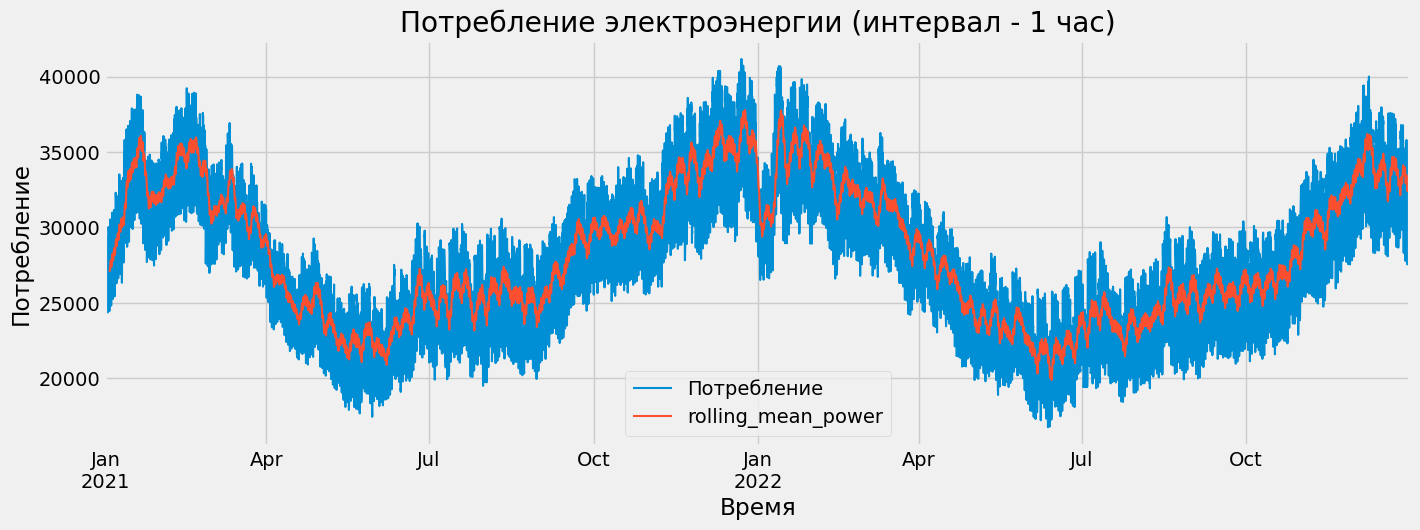

In [21]:
# Рассчёт "скользящего среднего" с окном равным 7 дней
df_power_new['rolling_mean_power'] = df_power_new['Потребление'].rolling(8*7).mean()
# Построение графика
df_power_new[['Потребление','rolling_mean_power']].plot(figsize=(15,5));
plt.ylabel('Потребление');
plt.xlabel('Время');
plt.title('Потребление электроэнергии (интервал - 1 час)');

**Замечание:** На первый взгляд данные выглядят адекватно (выбросов нет).

## Результирующая таблица.
Нам необходимо объединить данные двух таблиц и заполнить пропуски. В первой таблице интервал времени 3 часа а по условию задачи он должен составлять один час, поэтому нужно будет заполнитбь недостающие данные.

In [22]:
df = df_power.merge(df_wether, how='left', on='День-месяц-год часы:минуты')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17520 entries, 0 to 17519
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   День-месяц-год часы:минуты  17520 non-null  datetime64[ns]
 1   Потребление                 17520 non-null  int64         
 2   Температура воздуха         5834 non-null   float64       
 3   Скорость ветра              5834 non-null   float64       
 4   Направление ветра           5834 non-null   object        
 5   Осадки                      5834 non-null   object        
 6   Влажность                   5834 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 1.1+ MB
None


,День-месяц-год часы:минуты,Потребление,Температура воздуха,Скорость ветра,Направление ветра,Осадки,Влажность
0,2021-01-01 00:00:00,28228,-1.3,2.0,"Ветер, дующий с юго-юго-востока",Дымка.,93.0
1,2021-01-01 01:00:00,27279,NaN,NaN,NaN,NaN,NaN
2,2021-01-01 02:00:00,27151,NaN,NaN,NaN,NaN,NaN
3,2021-01-01 03:00:00,26413,-1.0,2.0,"Ветер, дующий с юго-юго-востока",Дымка.,94.0
4,2021-01-01 04:00:00,25514,NaN,NaN,NaN,NaN,NaN


### Заполнение пропусков.
Предположим что погода меняется плавно с течением времени.
Пропуски с численными значениями заполним методом линейной интерполяции.
Категориальные признаки постараемся заполнить соседними значениями, также равномерно.

In [23]:
# Заполнение пропусков методом интерполяции
df['Температура воздуха'] = df['Температура воздуха'].interpolate(method='linear',
                                                                  limit_direction='both',                             
                                                                  axis=0)
df['Скорость ветра'] = df['Скорость ветра'].interpolate(method='linear',
                                                        limit_direction='both',                             
                                                        axis=0)
df['Влажность'] = df['Влажность'].interpolate(method='linear',
                                              limit_direction='both',                             
                                              axis=0)
# Округление заполненных значений
df['Температура воздуха'] = df['Температура воздуха'].round(1)
df['Скорость ветра'] = df['Скорость ветра'].round()
df['Влажность'] = df['Влажность'].round()

In [24]:
# Заполнение пропусков соседними значениями
for i in range(10):
    df = df.ffill(limit=1)
    df = df.bfill(limit=1)

In [25]:
df.isna().sum()

День-месяц-год часы:минуты    0
Потребление                   0
Температура воздуха           0
Скорость ветра                0
Направление ветра             0
Осадки                        0
Влажность                     0
dtype: int64

In [26]:
# Приведение данных времени в требуемый формат "str"
df['День-месяц-год часы:минуты'] = df['День-месяц-год часы:минуты'].dt.strftime('%d-%m-%Y %H:%M')

**Замечание:** Для замены категориальных признаков пришлось повторить несколько раз операцию замены пропусков, так как в таблице `df_wether` данные были с некоторыми пропущенными интервалами (больше 3 часов).

### Сохранение данных в файл `xlsx` и загрузка его в базу данных.


In [27]:
# Выгрузка данных в файл
df.to_excel('data.xlsx')

In [28]:
# Импорт библиотеки
import sqlite3
sqlite3.sqlite_version

'3.39.3'

In [29]:
# Подключение к файлу базы данных с именем “db”
con = sqlite3.connect('db')

In [30]:
# Чтение данных из файла
data = pd.read_excel('data.xlsx')
data.rename(columns={'День-месяц-год часы:минуты': 'TimeHour',
                     'Потребление':'Power',
                     'Температура воздуха':'Temperature',
                     'Скорость ветра':'WindSpeed',
                     'Направление ветра':'WindDir',
                     'Осадки':'Presip',
                     'Влажность':'Humidity'}, inplace = True, errors='ignore')

In [31]:
# Запись исходной таблицы в базу SQL
data.to_sql('data', con, index=False, if_exists='replace')

17520

**Замечание:** Мы создали простую базу данных из одной таблицы в `SQlite`. Теперь мы можем выполнять `sql` запросы для получения необходимой информации.

In [32]:
# Выполнение SQL запроса
sql_1 = '''
SELECT data.TimeHour,
       data.Power,
       data.Temperature

FROM data 
WHERE data.TimeHour BETWEEN '01-08-2021' and '01-09-2021'
ORDER BY data.Power DESC 
LIMIT 10
'''

In [33]:
# Загрузка результатов запроса в pandas DataFrame
pd.read_sql(sql_1, con)

,TimeHour,Power,Temperature
0,01-08-2021 21:00,26898,22.0
1,01-08-2021 19:00,26665,23.5
2,01-08-2021 20:00,26540,22.8
3,01-08-2021 22:00,26483,20.9
4,01-08-2021 18:00,26341,24.3
5,01-08-2022 15:00,26269,25.4
6,01-08-2022 13:00,26267,24.1
7,01-08-2022 14:00,26260,24.8
8,01-08-2022 16:00,26227,25.2
9,01-08-2021 17:00,25987,23.6


**Замечание:** С помощью данного запроса мы увидели самые энергонагруженные часы в августе 2021 года. А также узнали температуру воздуха в это время.

# Задача 2

In [34]:
import numpy as np
import cvxpy as cvx

In [ ]:
df1 = pd.read_excel('input.xlsx', sheet_name='data')
df1

In [39]:
a = np.array(df1['Полезная нагрузка, МВт'].to_list())
b = np.array(df1['Переменная стоимость энергии, руб/МВтч'].to_list())

In [41]:
len(a)

744

In [42]:
len(b)

744

In [47]:
import numpy as np
from scipy.optimize import minimize

# Определим целевую функцию
def objective(x):
    return x[0]**2 + x[1]**2

# Начальное приближение
x0 = [1, 1]

# Оптимизация
result = minimize(objective, x0)

print(result)


      fun: 2.311471135620994e-16
 hess_inv: array([[ 0.75, -0.25],
       [-0.25,  0.75]])
      jac: array([-6.59986732e-09, -6.59986732e-09])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-1.07505143e-08, -1.07505143e-08])


In [50]:
from pulp import LpProblem, LpVariable, LpMinimize, lpSum

# Создаем задачу
problem = LpProblem("MyProblem", LpMinimize)

# Переменные
x = LpVariable('x', lowBound=0)  # x >= 0
y = LpVariable('y', lowBound=0)  # y >= 0

# Целевая функция
problem += 2*x + 3*y

# Ограничения
problem += x + 2*y >= 10
problem += 3*x + y >= 15

# Решение задачи
problem.solve()

print(f"x: {x.varValue}, y: {y.varValue}")


x: 4.0, y: 3.0
